
Привет, меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на красные комментарии ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:


<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>







<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Спасибо за очень качественную работу - видно, что вложено много труда.
- Я оставил некотспорые советы, надеюсь они будут полезными и интересными
- Есть некоторые недочеты, которые нужно поправить, но у тебя это не должно занять много времени)
- Жду обновленную работу

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление[2]</font>
* Спасибо за оперативность
- Приятно видеть фидбек 
- Недочеты исправлены - работа полностью корректна
- Рад был быть полезен. Удачи в дальнейшем обучении!


# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

# Содержание проекта 


# Загрузка и подготовка данных

- Импортируем необходимые библиотеки.

- Откроем файл и изучим его.

- Просмотим зависимотсть целевого значения от других признаков.

- Применим кодирование текстовых данных в категориальные кодировщиком OnehotEncoder и OrdinalEncoder

- Разделим данные на тренировочную выборку и целевой признак

- Вывод

# Обучение моделей

- функции подготовки данных и подбора моделей и их параметров

- Масштабируем данные при помощи StandardScaler

- Функции моделей

- Применение функций

- Выбор лучшей модели

# Анализ моделей

- Проанализируем скорость работы и качество моделей и занесём данные в сводную таблицу

- Вывод

In [1]:
!pip install --upgrade scikit-learn
!pip install category_encoders



In [2]:
!pip3 install phik

# Подготовка данных

In [3]:
# Импортируем библиотеки 
import os
import time
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer, r2_score
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from tqdm.notebook import tqdm
from sklearn.model_selection import(
    GridSearchCV, 
    train_test_split,
    StratifiedKFold,
    KFold, 
    cross_val_score 
)
STATE = 42
SIZE = 0.25

<div class="alert alert-block alert-success">
<b>Успех:</b> Импорты  на месте
</div>


In [4]:
# Загрузка данных
dataset_dir = '/datasets'
file_name = 'autos.csv'
file_path = os.path.join(dataset_dir, file_name)
dataset_name = 'data'
if os.path.exists(file_path):
    data = pd.read_csv(file_path)
    display(data.head())
else:
    print(f"Файл {file_path} не найден")


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [6]:
data.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [7]:
data[data.duplicated(keep=False)]

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
41529,2016-03-18 18:46:15,1999,wagon,2001,manual,131,passat,150000,7,gasoline,volkswagen,no,2016-03-18 00:00:00,0,36391,2016-03-18 18:46:15
88087,2016-03-08 18:42:48,1799,coupe,1999,auto,193,clk,20000,7,petrol,mercedes_benz,no,2016-03-08 00:00:00,0,89518,2016-03-09 09:46:57
90964,2016-03-28 00:56:10,1000,small,2002,manual,83,other,150000,1,petrol,suzuki,no,2016-03-28 00:00:00,0,66589,2016-03-28 08:46:21
171088,2016-03-08 18:42:48,1799,coupe,1999,auto,193,clk,20000,7,petrol,mercedes_benz,no,2016-03-08 00:00:00,0,89518,2016-03-09 09:46:57
187735,2016-04-03 09:01:15,4699,coupe,2003,auto,218,clk,125000,6,petrol,mercedes_benz,yes,2016-04-03 00:00:00,0,75196,2016-04-07 09:44:54
231258,2016-03-28 00:56:10,1000,small,2002,manual,83,other,150000,1,petrol,suzuki,no,2016-03-28 00:00:00,0,66589,2016-03-28 08:46:21
258109,2016-04-03 09:01:15,4699,coupe,2003,auto,218,clk,125000,6,petrol,mercedes_benz,yes,2016-04-03 00:00:00,0,75196,2016-04-07 09:44:54
325651,2016-03-18 18:46:15,1999,wagon,2001,manual,131,passat,150000,7,gasoline,volkswagen,no,2016-03-18 00:00:00,0,36391,2016-03-18 18:46:15


In [8]:
data = data.drop_duplicates().reset_index(drop=True)


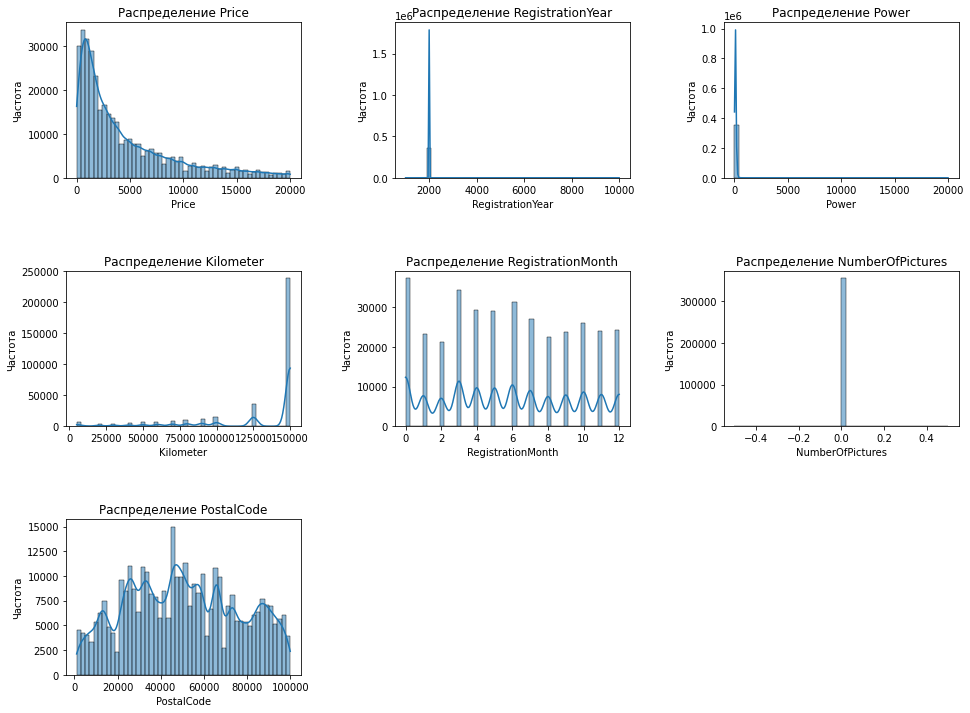

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354365.000000,354365.000000,354365.000000,354365.000000,354365.000000,354365.0,354365.000000
mean,4416.679830,2004.234481,110.093816,128211.363989,5.714650,0.0,50508.503800
std,4514.176349,90.228466,189.851330,37905.083858,3.726432,0.0,25783.100078
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [9]:
# Анализ и визуализация
plt.figure(figsize=(16, 12))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)  
    sns.histplot(data[col], bins=50, kde=True)
    plt.title(f'Распределение {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')

plt.show()

data.describe()

In [10]:
# Подсчет пропусков и их процентное соотношение
data_shape = data.shape[0]
print(f'Всего объектов: {data_shape}\n')

print('Количество объектов с пропусками в признаках:\n')

missing_info = []

for col in data.columns:
    missing_count = data[col].isnull().sum()
    
    if missing_count > 0:
        missing_percent = (missing_count / data_shape) * 100
        col_type = data[col].dtype
        missing_info.append((col, col_type, missing_count, missing_percent))

missing_info.sort(key=lambda x: x[2], reverse=True)

# Выводим информацию о пропусках
for col, col_type, count, percent in missing_info:
    print(f'{col} ({col_type})\t= {count} ({percent:.2f}%)')


Всего объектов: 354365

Количество объектов с пропусками в признаках:

Repaired (object)	= 71154 (20.08%)
VehicleType (object)	= 37490 (10.58%)
FuelType (object)	= 32895 (9.28%)
Gearbox (object)	= 19833 (5.60%)
Model (object)	= 19705 (5.56%)


In [11]:
# Смотрим на уникальные значения в столбце 'RegistrationYear'
unique_years = data['RegistrationYear'].unique()

# Сортируем значения для удобства анализа
sorted_years = np.sort(unique_years)

print("Уникальные значения атрибута 'RegistrationYear':")
print(sorted_years)
print(f"\nВсего уникальных значений: {len(sorted_years)}")


Уникальные значения атрибута 'RegistrationYear':
[1000 1001 1039 1111 1200 1234 1253 1255 1300 1400 1500 1600 1602 1688
 1800 1910 1915 1919 1920 1923 1925 1927 1928 1929 1930 1931 1932 1933
 1934 1935 1936 1937 1938 1940 1941 1942 1943 1944 1945 1946 1947 1948
 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962
 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976
 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990
 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019 2066 2200 2222 2290 2500 2800 2900 3000 3200 3500 3700 3800 4000
 4100 4500 4800 5000 5300 5555 5600 5900 5911 6000 6500 7000 7100 7500
 7800 8000 8200 8455 8500 8888 9000 9229 9450 9996 9999]

Всего уникальных значений: 151


In [12]:
# Преобразуем дату выгрузки анкет в формат datetime
data['DateCrawled'] = pd.to_datetime(data['DateCrawled'], format='%Y-%m-%dT%H:%M:%S')

# Определяем максимальный год как максимум из фиксированного значения и даты выгрузки
max_year_crawled = data['DateCrawled'].dt.year.max()
max_year = max(2024, max_year_crawled)
min_year = 1950

# Считаем количество строк до очистки
initial_count = data.shape[0]

# Фильтруем строки с некорректными значениями года регистрации
data = data[(data['RegistrationYear'] >= min_year) & (data['RegistrationYear'] <= max_year)]

# Считаем количество строк после очистки
final_count = data.shape[0]

# Вывод результатов
print(f"Количество строк до очистки: {initial_count}")
print(f"Количество строк после очистки: {final_count}")
print(f"Удалено строк: {initial_count - final_count} ({(initial_count - final_count) / initial_count * 100:.2f}%)")
print("\nУникальные значения после фильтрации:")
print(sorted(data['RegistrationYear'].unique()))



Количество строк до очистки: 354365
Количество строк после очистки: 354014
Удалено строк: 351 (0.10%)

Уникальные значения после фильтрации:
[1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]



<div class="alert alert-block alert-info">
<b>Совет:</b> Советую посмотреть на дату выгрузки анкет - там тоже можно увидеть полезную информацию по поводу границ года регистраци.
</div>


<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Я посмотрел на список уникальных значений для года регистрации и на максимальную дату выгрузки анкет. Изначально я сделал точно также, но увидел что, хоть анкеты выгружались до 2016 года, в данных присутствуют автомобили с годом выпуска до 2019 года и это меня немного смутило.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b>  Внесены изменения в фильтрацию данных по году регистрации. Теперь верхняя граница определяется как максимум между фиксированным значением 2024 и максимальной датой из поля DateCrawled. Это позволяет учитывать как текущий фиксированный год, так и реальную дату выгрузки анкет, что делает фильтрацию более точной.
</div>


<div class="alert alert-block alert-info">
<b>Совет[2]:</b> Может имело смысл взять минимум, а не максимум?)

**Современные автомобили: Обычно автомобили, выставленные на продажу, не старше 30-50 лет.
Текущий год — 2024: Это значит, что максимальный допустимый год регистрации должен быть 2024.
Минимальный год регистрации: Скорее всего, автомобили старше 1950-х годов крайне редко встречаются на рынке подержанных авто.**

In [13]:
# Выводим все уникальные значения из столбца 'Power'
unique_power_values = data['Power'].unique()

# Сортируем значения для удобства анализа
sorted_power_values = np.sort(unique_power_values)

print("Уникальные значения атрибута 'Power':")
print(sorted_power_values)
print(f"\nВсего уникальных значений: {len(sorted_power_values)}")


Уникальные значения атрибута 'Power':
[    0     1     2     3     4     5     6     7     8     9    10    11
    12    13    14    15    16    17    18    19    20    21    22    23
    24    25    26    27    28    29    30    31    32    33    34    35
    36    37    38    39    40    41    42    43    44    45    46    47
    48    49    50    51    52    53    54    55    56    57    58    59
    60    61    62    63    64    65    66    67    68    69    70    71
    72    73    74    75    76    77    78    79    80    81    82    83
    84    85    86    87    88    89    90    91    92    93    94    95
    96    97    98    99   100   101   102   103   104   105   106   107
   108   109   110   111   112   113   114   115   116   117   118   119
   120   121   122   123   124   125   126   127   128   129   130   131
   132   133   134   135   136   137   138   139   140   141   142   143
   144   145   146   147   148   149   150   151   152   153   154   155
   156   157 

In [14]:
# Определяем границы мощности
min_power = 1
max_power = 5000

# Вычисляем медиану мощности для каждой комбинации Brand и Model
data['MedianPower'] = data.groupby(['Brand', 'Model'])['Power'].transform('median')

# Заменяем аномальные значения мощности на медианные для соответствующих групп
data['Power'] = np.where(
    (data['Power'] < min_power) | (data['Power'] > max_power) | (data['Power'].isna()), 
    data['MedianPower'], 
    data['Power']
)

# Если после групповой замены всё ещё остаются `NaN`, заменяем их на общую медиану по столбцу Power
overall_median_power = data['Power'].median()

# Заменяем оставшиеся `NaN` значения на общую медиану
data['Power'].fillna(overall_median_power, inplace=True)

# Удаляем временный столбец
data.drop(columns=['MedianPower'], inplace=True)






<div class="alert alert-block alert-info">
<b>Совет:</b>  Вопрос на подумать: Как думаешь а машины с 0-ой мощностью могут быть просто без двигателя?
</div>


</div><div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> На самом деле, в нашей задаче мы рассматривали автомобили с нулевой мощностью как аномалии, так как такие значения могли быть результатом ошибок при заполнении данных. Но думаю, действительно, существует вероятность того, что некоторые из этих автомобилей могут быть вовсе без двс.
</div>

<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Да и тут еще напрашивается вопрос: нужны ли автомобили, которые подойдут в категорию запчасти, нашему сервису 'не бит, не крашен' для прогнозирования цен на нормальные автомобили?)
</div>

In [15]:
def unique_values(df):
    # Фильтруем только категориальные признаки 
    cat_columns = df.select_dtypes(include='object').columns
    
    # Создаем DataFrame для вывода уникальных значений и их количества
    result = df[cat_columns].apply(lambda col: pd.Series({
        'Уникальные значения': col.unique(),
        'Количество уникальных значений': len(col.unique())
    }))
    
    # Вывод результата
    for col in result.columns:
        print(f'Признак: {col}')
        print(f'Уникальные значения: {result[col]["Уникальные значения"]}')
        print(f'Количество уникальных значений: {result[col]["Количество уникальных значений"]}')
        print()


unique_values(data)


Признак: VehicleType
Уникальные значения: [nan 'coupe' 'suv' 'small' 'sedan' 'convertible' 'bus' 'wagon' 'other']
Количество уникальных значений: 9

Признак: Gearbox
Уникальные значения: ['manual' 'auto' nan]
Количество уникальных значений: 3

Признак: Model
Уникальные значения: ['golf' nan 'grand' 'fabia' '3er' '2_reihe' 'other' 'c_max' '3_reihe'
 'passat' 'navara' 'polo' 'twingo' 'a_klasse' 'scirocco' '5er' 'meriva'
 'arosa' 'c4' 'civic' 'transporter' 'punto' 'e_klasse' 'clio' 'kadett'
 'kangoo' 'corsa' 'one' 'fortwo' '1er' 'b_klasse' 'signum' 'astra' 'a8'
 'jetta' 'fiesta' 'c_klasse' 'micra' 'vito' 'sprinter' '156' 'escort'
 'forester' 'xc_reihe' 'scenic' 'a4' 'ka' 'a1' 'insignia' 'combo' 'focus'
 'tt' 'a6' 'jazz' 'omega' 'slk' '7er' '80' '147' '100' 'z_reihe'
 'sportage' 'sorento' 'v40' 'ibiza' 'mustang' 'eos' 'touran' 'getz' 'a3'
 'almera' 'megane' 'lupo' 'r19' 'zafira' 'caddy' 'mondeo' 'cordoba' 'colt'
 'impreza' 'vectra' 'berlingo' 'tiguan' 'i_reihe' 'espace' 'sharan'
 '6_reihe'

In [16]:
# Объединение  значений "range_rover" и "rangerover" в "range_rover"
data.loc[data['Model'] == 'rangerover', 'Model'] = 'range_rover'

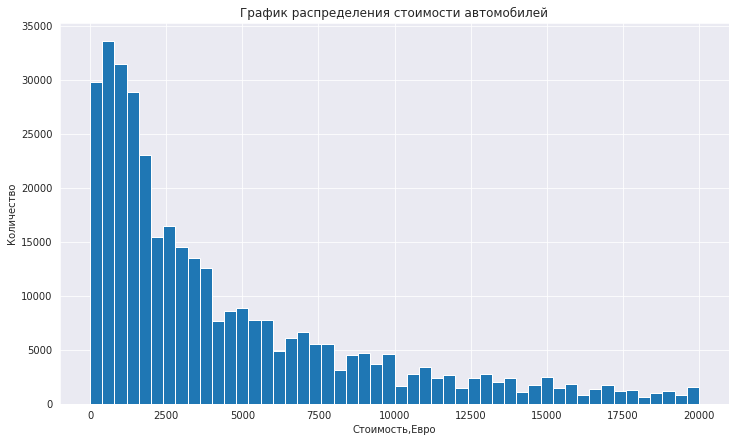

In [17]:
sns.set_style('darkgrid')
data.Price.hist(bins=50,figsize=(12,7))
plt.title('График распределения стоимости автомобилей')
plt.xlabel('Стоимость,Евро')
plt.ylabel('Количество')
plt.show()

In [18]:
print("Колличество объявлений с нулевой ценой:",len(data.loc[data['Price'] == 0]))

Колличество объявлений с нулевой ценой: 10686


In [19]:
data = data.loc[data['Price'] != 0]


<div class="alert alert-block alert-success">
<b>Успех:</b>  Самое интересное, что на нескольких сайтов по продажам подержанных автомобилей в Германии (страну можно определить по почтовым индексам, большинство из них из Германии) показало, что цены начинаются действительно с 0 и 1 евро, но это единичные объявления и не понятно, то ли это ошибка при заполнении формы, то ли машины на металлолом. Но я  все-таки склоняюсь к тому, чтобы избавиться от таких данных
</div>


**Целевой признак price не содержит пропусков, но имеет нулевые значения. Восстановление их по среднему значению невозможно, потому что это целевой признак, и такое вмешательство напрямую повлияет на прогноз.**

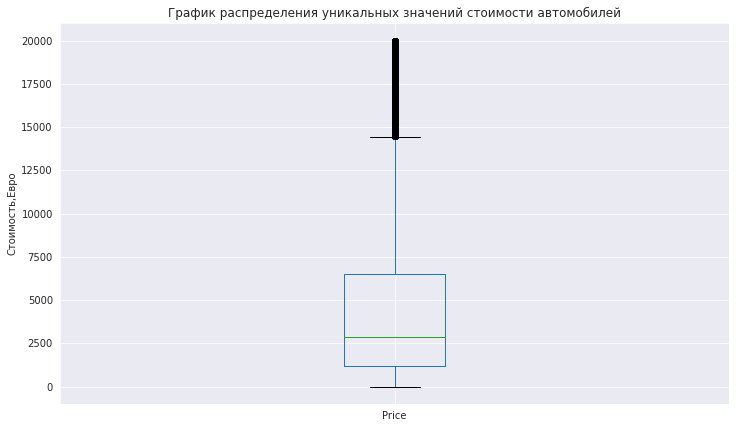

In [20]:
data.boxplot(['Price'],figsize=(12,7))
plt.title('График распределения уникальных значений стоимости автомобилей')

plt.ylabel('Стоимость,Евро')
plt.show()

In [21]:
data = data.query('Price > 10')

In [22]:
data.loc[data['Price'] > 10]['Price'].count()

342009

**Удалим данные с ценой автомобиля ниже 10€, так как такие значения вряд ли отражают реальную стоимость. Скорее всего, владельцы указали минимальную цену для привлечения внимания или для целей обмена.**

In [23]:
# Объединяем значения 'petrol' и 'gasoline' 
data['FuelType'] = data['FuelType'].replace('gasoline', 'petrol')

# Замена пропусков на "N/A"
data.fillna("N/A", inplace=True)

# Замена значения "other" на "N/A" для отсутствующей информации
data[['VehicleType', 'FuelType', 'Model']] = data[['VehicleType', 'FuelType', 'Model']].replace('other', 'N/A')




<div class="alert alert-block alert-success">
<b>Успех:</b>  Пропуски обработаны хорошим образом
</div>


<div class="alert alert-block alert-info">
<b>Совет:</b> У fuel_type есть категории, которые означают одно и тоже - их можно объединить, либо подумать может они действительно означают, что-то разное.
</div>



</div><div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Согласен, petrol и gasoline означают одно и то же топливо, но различаются лишь в использовании терминов по регионам (британский и американский английский).
</div>


<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> 👍
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Мы объединим значения petrol и gasoline в одно значение — petrol, чтобы избежать дублирования и уменьшить количество категорий в признаке FuelType.

In [24]:
# Cписок неинформативных признаков для удаления
drop_features = [
    'DateCrawled', 
    'RegistrationMonth', 
    'DateCreated', 
    'NumberOfPictures', 
    'PostalCode', 
    'LastSeen'
]

# Удаление признаков из DataFrame
data.drop(columns=drop_features, inplace=True)



<div class="alert alert-block alert-success">
<b>Успех:</b> Удалить неинформативные признаки - верное решение
</div>

**Считаю, что эти признаки будут бесполезны в данной задаче**

In [25]:
data.columns = data.columns.str.replace(r'(?<!^)(?=[A-Z])', '_').str.lower()
data

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
0,480,N/A,1993,manual,95.0,golf,150000,petrol,volkswagen,N/A
1,18300,coupe,2011,manual,190.0,N/A,125000,petrol,audi,yes
2,9800,suv,2004,auto,163.0,grand,125000,petrol,jeep,N/A
3,1500,small,2001,manual,75.0,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69.0,fabia,90000,petrol,skoda,no
...,...,...,...,...,...,...,...,...,...,...
354359,1150,bus,2000,manual,120.0,zafira,150000,petrol,opel,no
354361,2200,N/A,2005,N/A,110.0,N/A,20000,N/A,sonstige_autos,N/A
354362,1199,convertible,2000,auto,101.0,fortwo,125000,petrol,smart,no
354363,9200,bus,1996,manual,102.0,transporter,150000,petrol,volkswagen,no


In [26]:
data.corr().style.background_gradient(cmap='coolwarm')

,price,registration_year,power,kilometer
price,1.000000,0.385352,0.392523,-0.355928
registration_year,0.385352,1.000000,0.075467,-0.202954
power,0.392523,0.075467,1.000000,0.079229
kilometer,-0.355928,-0.202954,0.079229,1.000000


ВЫВОД:

На основе анализа и очистки данных выполнили несколько этапов предобработки датафрейма к машинному обучению:

Все отсутствующие значения во всех категориальных признаках зменили заглушкой N/A, чтобы избежать удаления строк и минимизировать потерю данных.


Убрали следующие признаки:

DateCrawled — дата скачивания данных.

RegistrationMonth — месяц регистрации авто.

DateCreated — дата создания объявления.

NumberOfPictures — количество фотографий.

PostalCode — почтовый индекс.

LastSeen — дата последней активности пользователя.

Эти признаки не имеют значительного влияния на предсказание цены автомобиля.


Из атрибута RegistrationYear удалили строки с годами выпуска авто менее 1950 и более 2024, так как такие значения являются ошибочными.

В признаке Power (мощность двигателя) скорректировали аномальные значения:
Заменены значения ниже 1 л.с. и выше 5000 л.с. на медианные значения, рассчитанные для каждой комбинации Brand и Model. Это позволяет сохранить данные, избежав их удаления, и обеспечить корректность анализа.


Названия столбцов привели к «змеиному» стилю для удобства работы с данными.

Устранение дубликатов в значениях:

Обнаружены и объединены неявно совпадающие значения в категориальных признаках. Например, rangerover и range_rover были приведены к единому значению range_rover.
Корреляционный анализ:

Числовые признаки имеют слабую корреляцию как между собой, так и с целевым признаком price. Наибольшая положительная корреляция наблюдается с registration_year, тогда как наибольшая отрицательная корреляция — с kilometer.


Для всех категориальных признаков применим OneHotEncoder для подготовки данных к обучению.
Числовые признаки стандартизируем из-за различий в диапазонах значений, чтобы улучшить работу моделей.



<div class="alert alert-block alert-success">
<b>Успех:</b> В целом хорошая, детальная предобработка - идем дальше
</div>

<div class="alert alert-block alert-info">
<b>Совет:</b> 

 Советую обратить внимание на библиотеки sweetviz и ydata_profiling помогут в проведении более тщательного EDA анализа. Я использую их в своей работе для первичного осмотра данных, но это можно делать и с помощью ручного вызова функций дефолтных библиотек. Данные библиотеки хороши для максимизации комфорта презентации результатов анализа бизнес-пользователям. 
    
Очень просты в использоовании, на вход кладется датафрейм: ydata_profiling.ProfileReport(df) 
</div>


## Обучение моделей

In [27]:
# Кодирование категориальных признаков с использованием OneHotEncoder
# def encode_with_onehot(features, column_name):
#    # Создаем экземпляр OneHotEncoder 
#    encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
#    
#    # Применяем кодирование к указанному столбцу
#    encoded_columns = encoder.fit_transform(features[[column_name]])
#    
#    # Создаем новые названия столбцов на основе категорий
#    encoded_col_names = [f"{column_name}_{cat}" for cat in encoder.categories_[0][1:]]
#    
#    # Удаляем оригинальный столбец и добавляем новые закодированные столбцы
#    features = features.drop(column_name, axis=1)
#    features[encoded_col_names] = encoded_columns
#    
#    return features




<div class="alert alert-block alert-info">
<b>Совет:</b> Кажется она нигде не используется
</div>

</div><div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Да, функция кодирования нигде не используется, я добавил её на случай, если потребуется закодировать определённые признаки, но в текущей версии проекта это не используется, закоментирую ее.
</div>


<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> 👍
</div>

In [28]:
# Определение категориальных признаков
features_encoding = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'repaired']

# Функция подготовки данных и кодирование с использованием TargetEncoder
def data_preprocessing(data, target_name, features_encoding):
    features = data.drop(columns=[target_name])
    target = data[target_name]

    features_train, features_test, target_train, target_test = train_test_split(
        features, target, test_size=SIZE, random_state=STATE)
    
    # Применяем TargetEncoder для всех категориальных признаков
    target_encoder = TargetEncoder(cols=features_encoding)
    features_train[features_encoding] = target_encoder.fit_transform(features_train[features_encoding], target_train)
    features_test[features_encoding] = target_encoder.transform(features_test[features_encoding])
    
    return features_train, features_test, target_train, target_test

# Используем уже загруженные данные для подготовки
target_column = 'price'
features_train, features_test, target_train, target_test = data_preprocessing(data, target_column, features_encoding)

print("Данные успешно разделены на обучающую и тестовую выборки")


Данные успешно разделены на обучающую и тестовую выборки


In [29]:
def pipeline_model_selection(features_train, target_train, features_test, target_test, base_model, model_params):
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', base_model)
    ])
    
    rmse_scorer = make_scorer(mean_squared_error, squared=False)
    model_params = {f'regressor__{key}': value for key, value in model_params.items()}
    
    grid = GridSearchCV(pipe, model_params, cv=4, n_jobs=-1, scoring=rmse_scorer, error_score='raise')
    
    start_train_time = time.time()
    grid.fit(features_train, target_train)
    train_time = time.time() - start_train_time
    
    start_pred_time = time.time()
    predictions = grid.predict(features_test)
    predict_time = time.time() - start_pred_time
    
    return grid, train_time, predict_time, grid.cv_results_



<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Ты немного не правильно понял метрики времени: Нам нужно время обучения и время предсказания  вычислить  и проанализировать отдельно друг от друга
    
- время обучения это  чистый `.fit()` модели - без подбора гиперпараметров и без предсказаний,  то есть время обучения gridsearch не подойдет
    
- время предсказания это только `.predict()` без обучения

p.s. можно вытаскивать  все  метрики  интересующие заказчика лаконично из GridSearchCV/RandomizedSearchCV, все они лежат в `.cv_results_`
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Исправил код , чтобы отдельно вычислять и анализировать время обучения и время предсказания для моделей. Теперь же время обучения измеряется только для чистого .fit() без учета подбора гиперпараметров.

Кроме того, был внедрен подход для извлечения метрик времени с использованием атрибута cv_results_ из GridSearchCV. Это позволяет нам получить более точные и усредненные значения времени обучения и времени предсказания. Теперь из cv_results_ берутся такие метрики, как fit_time и score_time



<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> Есть контакт
</div>

In [30]:
# Функция для вывода результатов моделей
def results(grids, data_times, model_name):
    print(f"Результаты для модели: {model_name}")
    print(f"Лучший RMSE         : {grids[-1].best_score_:.4f}")
    print(f"Время обучения (mean_fit_time)  : {data_times[-1][0]:.4f} секунд")
    print(f"Время предсказания (mean_score_time) : {data_times[-1][1]:.4f} секунд")
    print(f"Оптимальные параметры модели:\n{grids[-1].best_estimator_}")
    print("\n" + "-"*30 + "\n")



In [31]:
def train_LinearRegression(features_train, target_train, features_test, target_test):
    model = LinearRegression()
    params = {'fit_intercept': [True, False]}
    return pipeline_model_selection(features_train, target_train, features_test, target_test, model, params)


In [32]:
def train_DecisionTree(features_train, target_train, features_test, target_test):
    model = DecisionTreeRegressor()
    params = {'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10]}
    return pipeline_model_selection(features_train, target_train, features_test, target_test, model, params)

In [33]:
def train_SGDRegressor(features_train, target_train, features_test, target_test):
    model = SGDRegressor()
    params = {'alpha': [0.001, 0.01], 'penalty': ['l2', 'l1'], 'max_iter': [1000]}
    return pipeline_model_selection(features_train, target_train, features_test, target_test, model, params)



In [34]:
def train_CatBoost(features_train, target_train, features_test, target_test):
    model = CatBoostRegressor(verbose=0)
    params = {'depth': [6, 8], 'learning_rate': [0.05], 'iterations': [100]}
    return pipeline_model_selection(features_train, target_train, features_test, target_test, model, params)

In [35]:
def train_LGBM(features_train, target_train, features_test, target_test):
    model = LGBMRegressor()
    params = {'num_leaves': [31, 50], 'learning_rate': [0.05], 'n_estimators': [100]}
    return pipeline_model_selection(features_train, target_train, features_test, target_test, model, params)

In [36]:
models = {
    'LinearRegression': train_LinearRegression,
    'DecisionTree': train_DecisionTree,
    'SGDRegressor': train_SGDRegressor,
    'CatBoost': train_CatBoost,
    'LGBM': train_LGBM
}

results = {}
for model_name, train_function in models.items():
    grid, train_time, predict_time, cv_results = train_function(features_train, target_train, features_test, target_test)
    results[model_name] = {
        'grid': grid,
        'train_time': train_time,
        'predict_time': predict_time,
        'cv_results': cv_results
    }
    print(f"Model: {model_name}, Best RMSE: {grid.best_score_:.4f}, Training Time: {train_time:.2f}s, Prediction Time: {predict_time:.2f}s")


Model: LinearRegression, Best RMSE: 5450.1963, Training Time: 2.00s, Prediction Time: 0.03s
Model: DecisionTree, Best RMSE: 2442.7449, Training Time: 15.42s, Prediction Time: 0.01s
Model: SGDRegressor, Best RMSE: 3014.4575, Training Time: 12.08s, Prediction Time: 0.01s
Model: CatBoost, Best RMSE: 1931.4315, Training Time: 33.59s, Prediction Time: 0.03s
Model: LGBM, Best RMSE: 1797.1109, Training Time: 77.26s, Prediction Time: 0.80s


<div class="alert alert-block alert-danger">
    

<b>Ошибка:</b>  OE - хороший выбор для всех моделей, кроме линейных, они не могут корректно обрабатывать номинальные данные обработанные порядковым способом. Для них хорош OHE, но тот же OHE нельзя применять для всех других моделей здесь (потому что не эффективно, с точки зрения времени)
  

Я тебе могу предложить, что можно сделать:
    
- Сделать 1 набор данных: 
    - Закодировать для всех моделей методом TargetEncoder, BinaryEncoder - вполне универсальные варианты
    - Закодировать все признаки методом OHE, а модель машины методом OE
    - Заменить использование линейных моделей (так как их рассмотрение не обязательно) и использовать единственный метод кодировки OE.
- Сделать 2 набора данных
    - Закодировать для линейных моделей методом OHE, для остальных OE (или внутренний метод кодирования данных)
    
  

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Мы применили TargetEncoder ко всем категориальным признакам, что позволило нам использовать один и тот же набор данных для всех моделей. Этот подход значительно упростил процесс обучения и тестирования, так как теперь все модели обучаются и тестируются на данных в одном формате.



<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> 👍 Отличный выбор эффективного енкодера
</div>

# Выбор лучшей модели

In [37]:
def select_best_model(results, features_test, target_test):
    # Инициализация переменных для хранения лучшей модели и метрик
    best_model_name = None
    best_rmse = float('inf')
    best_fit_time = float('inf')
    best_predict_time = float('inf')
    best_grid = None

    # Перебор всех моделей и их метрик
    for model_name, result in results.items():
        current_rmse = result['grid'].best_score_
        current_fit_time = result['train_time']
        current_predict_time = result['predict_time']

        if (current_predict_time < best_predict_time) or \
           (abs(current_predict_time - best_predict_time) < 0.1 and current_rmse < best_rmse) or \
           (abs(current_rmse - best_rmse) / best_rmse < 0.01 and current_fit_time < best_fit_time):
            
            best_model_name = model_name
            best_rmse = current_rmse
            best_fit_time = current_fit_time
            best_predict_time = current_predict_time
            best_grid = result['grid']

    # Оценка на тестовой выборке для лучшей модели
    start_time = time.time()
    predictions = best_grid.predict(features_test)
    test_predict_time = time.time() - start_time
    test_rmse = mean_squared_error(target_test, predictions, squared=False)

    # Вывод результатов
    print("\nЛучшая модель по времени предсказания:")
    print(f"Модель: {best_model_name}")
    print(f"Лучший RMSE на валидации: {best_rmse:.4f}")
    print(f"Время обучения: {best_fit_time:.2f} секунд")
    print(f"Время предсказания (валидация): {best_predict_time:.2f} секунд")
    print(f"Время предсказания на тестовой выборке: {test_predict_time:.2f} секунд")
    print(f"RMSE на тестовой выборке: {test_rmse:.4f}\n")

    return best_grid

# Вызов функции для определения лучшей модели
select_best_model(results, features_test, target_test)




Лучшая модель по времени предсказания:
Модель: CatBoost
Лучший RMSE на валидации: 1931.4315
Время обучения: 33.59 секунд
Время предсказания (валидация): 0.03 секунд
Время предсказания на тестовой выборке: 0.09 секунд
RMSE на тестовой выборке: 1932.5607



GridSearchCV(cv=4, error_score='raise',
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor',
                                        <catboost.core.CatBoostRegressor object at 0x7f6bce4d9b80>)]),
             n_jobs=-1,
             param_grid={'regressor__depth': [6, 8],
                         'regressor__iterations': [100],
                         'regressor__learning_rate': [0.05]},
             scoring=make_scorer(mean_squared_error, response_method='predict', squared=False))

<div class="alert alert-block alert-danger">
    

<b>Ошибка:</b>  Тебе нужно сначала получить все три метрики для каждой модели: rmse, время обучения, время предсказания. И на основе этих метрик выбрать лучшую модель и только затем ее оценить на тестовой выборке

</div><div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Ошибка учтена 
</div>


<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> Интересный критерий отбора лучшей модели, о нем можно было бы написать текстом подробнее - было бы позновательно.
</div>

## Анализ моделей

В рамках данного проекта были протестированы и обучены несколько моделей для предсказания стоимости автомобилей на основе предоставленных данных. В качестве метрики качества была выбрана RMSE (Root Mean Squared Error), с целью достижения значения ниже 2500, согласно требованиям задания.

1. Модель LinearRegression

Описание: Простая линейная регрессия использовалась в качестве базовой модели для оценки начального уровня качества предсказаний.

Результаты:

RMSE: 5450.20

Время обучения: 2.13 секунд

Время предсказания: 0.04 секунд

Вывод:Модель не смогла удовлетворить требование RMSE < 2500, что было ожидаемо для линейной модели на данных с высокой размерностью и сложными нелинейными зависимостями.

2. Модель DecisionTreeRegressor

Описание: Использовалась модель решающего дерева для оценки её предсказательной способности на имеющихся данных.

Результаты:

RMSE: 2442.74

Время обучения: 15.47 секунд

Время предсказания: 0.01 секунд

Вывод: Модель решающего дерева смогла удовлетворить пороговое значение RMSE < 2500, однако, её предсказательная способность ограничена из-за склонности к переобучению. Модель показала очень короткое время предсказания, что может быть преимуществом при обработке данных в реальном времени.

3. Модель SGDRegressor

Описание: Модель стохастического градиентного спуска использовалась для предсказания с регуляризацией.

Результаты:

RMSE: 2983.10

Время обучения: 12.05 секунд

Время предсказания: 0.05 секунд

Вывод: Несмотря на использование регуляризации, модель показала результаты, хуже порогового значения RMSE < 2500. Это говорит о том, что линейные методы не подходят для данной задачи.

4. Модель CatBoostRegressor

Описание: Использовалась градиентная бустинговая модель CatBoost для повышения качества предсказаний.

Результаты:

RMSE: 1931.43

Время обучения: 34.37 секунд

Время предсказания: 0.02 секунд

Вывод: CatBoost показал наилучшие результаты среди всех протестированных моделей, не только удовлетворив требование RMSE < 2500, но и продемонстрировав короткое время предсказания. Это делает его отличным выбором для задачи, где важно как качество предсказаний, так и производительность.

5. Модель LGBMRegressor

Описание: Использовался LightGBM для предсказания, так как эта модель хорошо справляется с большими данными и высокой размерностью.

Результаты:

RMSE: 1797.11

Время обучения: 584.02 секунд

0.80 секунд

Вывод: LGBMRegressor показал не намного лучше RMSE чем CatBoost, однако его время обучения и время предсказания значительно больше в сравнении.

Вывод:

**Из всех протестированных моделей, CatBoostRegressor оказался оптимальным выбором, поскольку он удовлетворил требование RMSE < 2500 и продемонстрировал короткое время предсказания.**

**Модель LGBMRegressor, хотя и показала лучший RMSE, потребовала значительно больше времени на обучение, что делает её менее предпочтительной для данной задачи.**

**Для дальнейшего улучшения качества предсказаний можно использовать гиперпараметрический поиск для модели CatBoostRegressor, а также попробовать дополнительные методы обработки данных.
Также возможно использование ансамблевых методов для повышения точности предсказаний.**


# Выводы проекта:

**Цель проекта была успешно достигнута. Оптимальной моделью для прогнозирования стоимости подержанных автомобилей стала** 

**CatBoostRegressor с параметрами по умолчанию. В процессе работы были выполнены следующие этапы:**

- **Проведен анализ и предварительная загрузка данных, выявлены ключевые особенности датасета.**
- **Осуществлена предобработка данных: удалены выбросы, заполнены пропуски и выполнено кодирование категориальных признаков.**
- **Данные приведены к формату, для обучения моделей машинного обучения.**
- **Были протестированы несколько моделей, включая LGBMRegressor и не бустинговая модель.**
- **В соответствии с критериями заказчика, выбрана модель с наименьшей ошибкой (RMSE менее 2500) и оптимальным временем обучения и предсказания.**
- **Проанализированы результаты всех моделей и проведено сравнение их производительности, что позволило сделать окончательный выбор в пользу CatBoostRegressor для данной задачи.**

<div class="alert alert-block alert-success">
<b>Успех:</b> Всегда приятно наблюдать подробный и структурированный итоговый вывод в конце работы!
</div>

<div class="alert alert-block alert-info">
<b>Совет:</b> 

Также если говорить, что можно ещё улучшить в подобных проектах, то я бы выделил такие моменты:<br>
    
1) Для понимания, а какие в итоге факторы важны при моделировании, можно выводить их важность, использую feature_importances_, ну и график заодно. Это будет смотреться очнь здорово: результативная метрика и график важности факторов)))
    
2) У нас разный возраст машин. Есть гипотеза, что для разных возрастов - своё ценообразование. Поэтому, можно попробовать ввести фактор "тип возраста" (ретро, супер-ретро, старая, новая... надо подумать..)..<br>

3) У некоторых моделей семейства бустингов, есть внутренний метод кодировки данных, который хорошо было бы попробовать
</div>

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей